In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data=pd.read_csv('heightweight.csv')

In [3]:
raw_data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [4]:
raw_data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [5]:
y=raw_data['Weight']
x1=raw_data['Height']

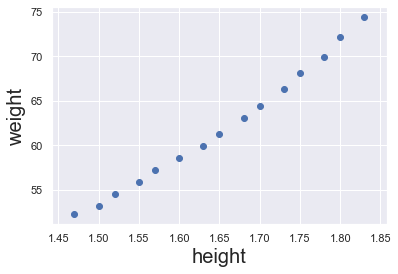

In [6]:
plt.scatter(x1,y)
plt.xlabel('height',fontsize=20)
plt.ylabel('weight',fontsize=20)
plt.show()


In [7]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

C:\Users\Home\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.60e-14
Time:                        00:39:04   Log-Likelihood:                -16.076
No. Observations:                  15   AIC:                             36.15
Df Residuals:                      13   BIC:                             37.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.0620      2.938    -13.295      0.000     -45.409     -32.715
Height        61.2722      1.776     34.502      0.000      57.436      65.109
==============================================================================
Omnibus:                        1.635   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.313
Skew:                           0.617   Prob(JB):                        0.519
Kurtosis:                       2.241   Cond. No.                         33.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

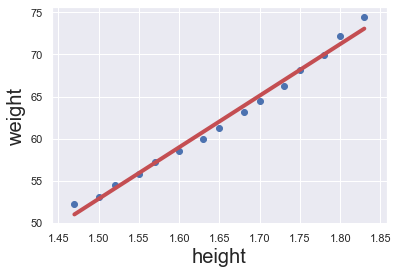

In [8]:
plt.scatter(x1,y)
yhat=-39.0620+61.2722*x1
fig=plt.plot(x1,yhat,lw=4,c='r',label='regression label')
plt.xlabel('height',fontsize=20)
plt.ylabel('weight',fontsize=20)
plt.show()



In [9]:
a=raw_data['Height']

In [10]:
b=raw_data['Weight']

In [11]:
a.shape
a

0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
Name: Height, dtype: float64

In [12]:
a.shape

(15,)

In [13]:
a_matrix=a.values.reshape(15,1)
a_matrix.shape

(15, 1)

In [14]:
b.shape

(15,)

In [15]:
b_matrix=b.values.reshape(15,1)
b_matrix.shape


(15, 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
a_matrix_train,a_matrix_test,b_matrix_train,b_matrix_test=train_test_split(a_matrix,b_matrix,test_size=.2,random_state=100)

In [18]:
reg=LinearRegression()
reg.fit(a_matrix_train,b_matrix_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predictions=reg.predict(a_matrix_test)

In [20]:
predictions.shape

(3, 1)

In [21]:
b_matrix_test

array([[64.47],
       [53.12],
       [69.92]])

In [22]:
b_matrix_test.shape

(3, 1)

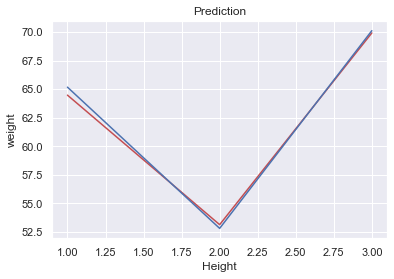

In [23]:
c = [i for i in range (1,len(b_matrix_test)+1,1)]
plt.plot(c,b_matrix_test,color='r',linestyle='-')
plt.plot(c,predictions,color='b',linestyle='-')
plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Prediction')
plt.show()